<a href="https://colab.research.google.com/github/Gongsoo/Gongsoo/blob/main/CIFAR-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
import matplotlib.pyplot as plt
from google.colab import files

Mounted at /gdrive


In [ ]:
#packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import pandas as pd

import PIL
import shutil
import zipfile
import glob
import os
import time

In [ ]:
data_zip_dir = '/content/drive/MyDrive'
train_zip_dir = os.path.join(data_zip_dir, 'train.zip')
test_zip_dir = os.path.join(data_zip_dir, 'test1.zip')
 
with zipfile.ZipFile(train_zip_dir, 'r') as z:
    z.extractall()
with zipfile.ZipFile(test_zip_dir, 'r') as z:
    z.extractall()

In [ ]:
train_dir = os.path.join('/content/drive/MyDrive')
test_dir = os.path.join('/content/drive/MyDrive')
 
train_set_dir = os.path.join(train_dir, 'train1')
os.mkdir(train_set_dir)
valid_set_dir = os.path.join(train_dir, 'valid1')
os.mkdir(valid_set_dir)
test_set_dir = os.path.join(train_dir, 'test1')
os.mkdir(test_set_dir)
 
dog_files = [f'dog.{i}.jpg' for i in range(12500)]
cat_files = [f'cat.{i}.jpg' for i in range(12500)]


In [ ]:
for dog, cat in zip(dog_files[:10000], cat_files[:10000]):
    src = os.path.join(train_dir+'/train', dog)
    dst = os.path.join(train_set_dir, dog)
    shutil.move(src, dst)
    src = os.path.join(train_dir+'/train', cat)
    dst = os.path.join(train_set_dir, cat)
    shutil.move(src, dst)
    
for dog, cat in zip(dog_files[10000:11250], cat_files[10000:11250]):
    src = os.path.join(train_dir+'/train', dog)
    dst = os.path.join(valid_set_dir, dog)
    shutil.move(src, dst)
    src = os.path.join(train_dir+'/train', cat)
    dst = os.path.join(valid_set_dir, cat)
    shutil.move(src, dst)
    
for dog, cat in zip(dog_files[11250:12500], cat_files[11250:12500]):
    src = os.path.join(train_dir+'/train', dog)
    dst = os.path.join(test_set_dir, dog)
    shutil.move(src, dst)
    src = os.path.join(train_dir+'/train', cat)
    dst = os.path.join(test_set_dir, cat)
    shutil.move(src, dst)

In [ ]:
#Data Generator

class CustomDataset(torch.utils.data.Dataset) :
  def __init__(self, files, root, mode='train',transform=None) :
    self.files = files
    self.root = root
    self.mode = mode
    self.transform = transform
    
    if 'cat' in files[0] :
      self.label = 0
    else :
      self.label = 1

  def __len__(self) :
    return len(self.files)

  def __getitem__(self,index) :
    img = PIL.Image.open(os.path.join(self.root,self.files[index]))

    if self.transform :
      img = self.transform(img)
    if self.mode == 'train' :
      return img, np.array([self.label])
    else :
      return img, np.files[index]


In [ ]:
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((256,256)),
    torchvision.transforms.RandomCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
])
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,244)),
    torchvision.transforms.ToTensor(),
])
#resize : 256 256 사이즈 변환
#RandomCrop : Zoom효과
#RandomHorizontalFlip : 랜덤 좌우반전
#ToTensor() : np를 torch.FloatTensor로 변환하고 0~255를 0~1로 변환

In [ ]:
train_dog_dataset = CustomDataset(dog_files[:10000], train_set_dir, transform=train_transform)
train_cat_dataset = CustomDataset(cat_files[:10000], train_set_dir, transform=train_transform)
valid_dog_dataset = CustomDataset(dog_files[10000:11250], valid_set_dir, transform=test_transform)
valid_cat_dataset = CustomDataset(cat_files[10000:11250], valid_set_dir, transform=test_transform)
test_dog_dataset = CustomDataset(dog_files[11250:], test_set_dir, transform=test_transform)
test_cat_dataset = CustomDataset(cat_files[11250:], test_set_dir, transform=test_transform)
 
train_dataset = torch.utils.data.ConcatDataset([train_dog_dataset, train_cat_dataset])
valid_dataset = torch.utils.data.ConcatDataset([valid_dog_dataset, valid_cat_dataset])
test_dataset = torch.utils.data.ConcatDataset([test_dog_dataset, test_cat_dataset])

#label 별 dataset 생성

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True,num_workers = 0)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=True,num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True,num_workers = 0)


tensor([[[[0.2549, 0.2745, 0.2549,  ..., 0.6431, 0.6196, 0.6196],
          [0.2353, 0.2588, 0.2471,  ..., 0.6431, 0.6078, 0.6039],
          [0.2353, 0.2588, 0.2549,  ..., 0.6392, 0.6000, 0.5882],
          ...,
          [0.1490, 0.1569, 0.1529,  ..., 0.2039, 0.2118, 0.2667],
          [0.1176, 0.1176, 0.1216,  ..., 0.2157, 0.2157, 0.2706],
          [0.0980, 0.1020, 0.1176,  ..., 0.2275, 0.2275, 0.2863]],

         [[0.1725, 0.1882, 0.1804,  ..., 0.4980, 0.4745, 0.4745],
          [0.1569, 0.1765, 0.1765,  ..., 0.4980, 0.4627, 0.4588],
          [0.1647, 0.1882, 0.1882,  ..., 0.4941, 0.4549, 0.4431],
          ...,
          [0.1255, 0.1373, 0.1451,  ..., 0.1804, 0.2000, 0.2627],
          [0.0902, 0.0980, 0.1137,  ..., 0.1961, 0.2078, 0.2706],
          [0.0706, 0.0824, 0.1098,  ..., 0.2078, 0.2235, 0.2902]],

         [[0.2510, 0.2667, 0.2431,  ..., 0.4353, 0.4078, 0.4039],
          [0.2157, 0.2392, 0.2235,  ..., 0.4314, 0.4000, 0.3882],
          [0.2039, 0.2275, 0.2157,  ..., 0

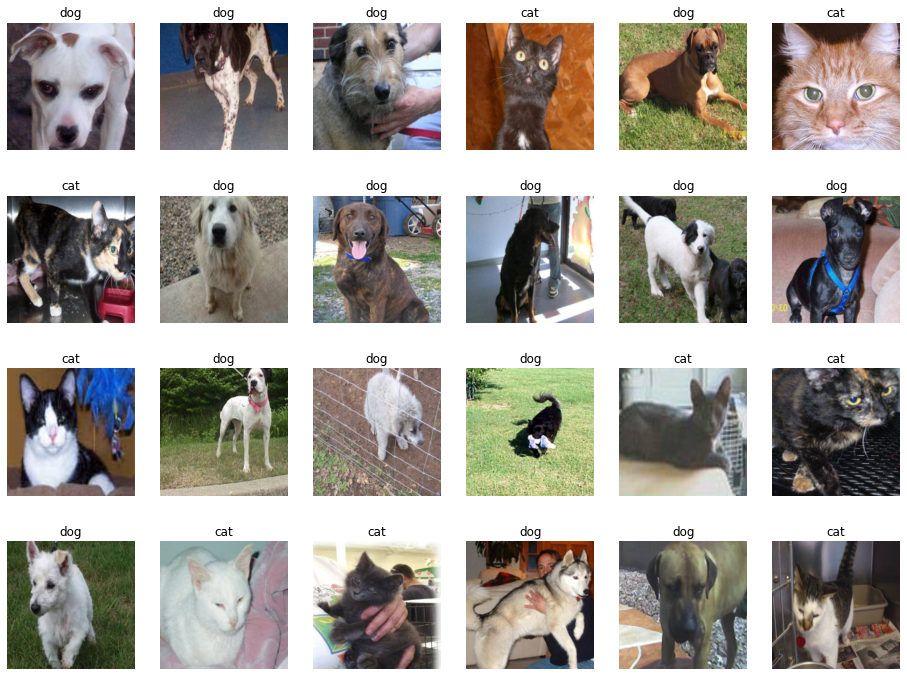

In [ ]:
samples, labels = next(iter(train_loader))
classes = {0:'cat', 1:'dog'}
fig = plt.figure(figsize=(16,24))
for i in range(24):
    a = fig.add_subplot(4,6,i+1)
    a.set_title(classes[labels[i].item()])
    a.axis('off')
    a.imshow(np.transpose(samples[i].numpy(), (1,2,0)))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)


In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
# define model network 이거 왜 안되냐 ㅡㅡ
class AlexNet(nn.Module) :
    def __init__(self) -> None :
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256*6*6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 1),)
        
    def forward(self, x :torch.Tensor) -> torch.Tensor :
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [ ]:
model = torchvision.models.resnet50(pretrained=True)

In [ ]:
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs,1024),
    nn.Dropout(0.2),
    nn.Linear(1024,512),
    nn.Dropout(0.1),
    nn.Linear(512,1),
    nn.Sigmoid()

)

In [ ]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.BCELoss()

In [ ]:
from torchsummary import summary
model.cuda()
summary(model,input_size=(3,224,224))

RuntimeError: ignored

In [ ]:
#train function

def model_fit(model, criterion, optimizer,epochs,train_loader, valid_loader) :
  model.train()

  train_loss = 0
  train_acc = 0
  train_correct = 0

  train_losses = []
  train_accs = []
  val_losses = []
  val_accs = []

  for epoch in range(epochs) :
    start = time.time()
    for train_x, train_y in train_loader :
      model.train()
      train_x, train_y = train_x.to(device), train_y.to(device)
      optimizer.zero_grad()
      pred = model(train_x)
      loss = criterion(pred.to(torch.float32),train_y.to(torch.float32))
      loss.backward()
      optimizer.step()

      train_loss += loss.item()

      y_pred = pred.cpu()#??
      y_pred[y_pred >=0.5] = 1
      y_pred[y_pred<0.5] = 0
      train_correct += y_pred.eq(train_y.cpu()).int().sum()

    val_loss = 0
    val_acc = 0
    val_correct = 0
    for valid_x, valid_y in valid_loader:
      with torch.no_grad():
          model.eval()
          valid_x, valid_y = valid_x.to(device), valid_y.to(device).float()
          pred = model(valid_x)
          loss = criterion(pred.to(torch.float32), valid_y.to(torch.float32))
      valid_loss += loss.item()
      
      y_pred = pred.cpu()
      y_pred[y_pred >= 0.5] = 1
      y_pred[y_pred < 0.5] = 0
      valid_correct += y_pred.eq(valid_y.cpu()).int().sum()
        
      train_acc = train_correct/len(train_loader.dataset)
      valid_acc = valid_correct/len(valid_loader.dataset)
      
      print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')
      
      train_losses.append(train_loss/len(train_loader))
      train_accuracies.append(train_acc)
      valid_losses.append(valid_loss/len(valid_loader))
      valid_accuracies.append(valid_acc)
      
      train_loss = 0
      train_acc = 0
      train_correct = 0
    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()
    
    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()

In [ ]:
torch.backends.cudnn.enabled = False
model_fit(model,criterion,optimizer,10,train_loader,valid_loader)

RuntimeError: ignored